### Research Question
* Is there a significant difference in sleep duration between people with and without sleep disorders?

#### Hypotheses
* Null Hypothesis (H₀): There is no significant difference in sleep duration between people with and without sleep disorders.

* Alternative Hypothesis (H₁): There is a significant difference in sleep duration between people with and without sleep disorders

##### Research Objectives
* To assess the average sleep duration of individuals with and without sleep disorders.

* To test the assumption of normality for both groups.

* To perform an independent samples t-test to determine if sleep disorder status significantly affects sleep duration.

* To interpret and draw conclusions based on the p-value and statistical test results.

* To visualize the distribution of sleep duration across the two groups.

###### Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
df = pd.read_csv(r'Sleep_health_and_lifestyle_dataset.csv')

In [52]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [53]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
df.shape

(374, 13)

In [6]:
df.columns.values

array(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'], dtype=object)

In [7]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

######  Exploratory Data Analysis

What is the average sleep duration?



Average Sleep Duration: 7.13 hours


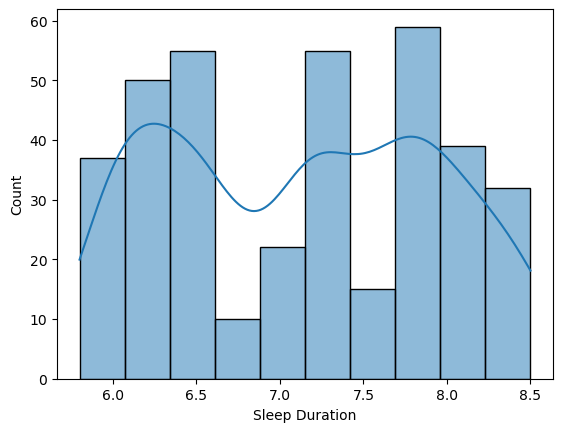

In [23]:
avg_sleep = df['Sleep Duration'].mean()

sns.histplot(df['Sleep Duration'], kde=True)

print(f"Average Sleep Duration: {avg_sleep:.2f} hours")


What is the most common sleep disorder in the dataset?

In [25]:
most_common_disorder = df['Sleep Disorder'].value_counts().idxmax()
print(f"Most Common Sleep Disorder: {most_common_disorder}")


Most Common Sleep Disorder: None


Do people with higher stress levels sleep less?

Correlation between Stress Level and Sleep Duration: -0.81


<Axes: xlabel='Sleep Duration', ylabel='Stress Level'>

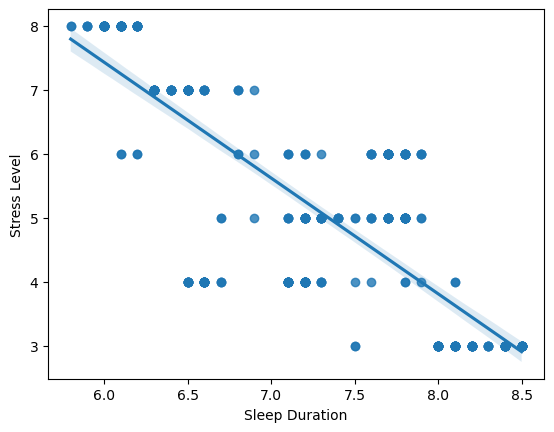

In [43]:
correlation = df['Sleep Duration'].corr(df['Stress Level'])
print(f"Correlation between Stress Level and Sleep Duration: {correlation:.2f}")

sns.regplot(x='Sleep Duration', y='Stress Level', data=df)


What is the gender distribution in the dataset?

In [28]:
gender_dist = df['Gender'].value_counts(normalize=True) * 100
print(gender_dist.round(1))


Male      50.5
Female    49.5
Name: Gender, dtype: float64


<Axes: xlabel='Gender', ylabel='count'>

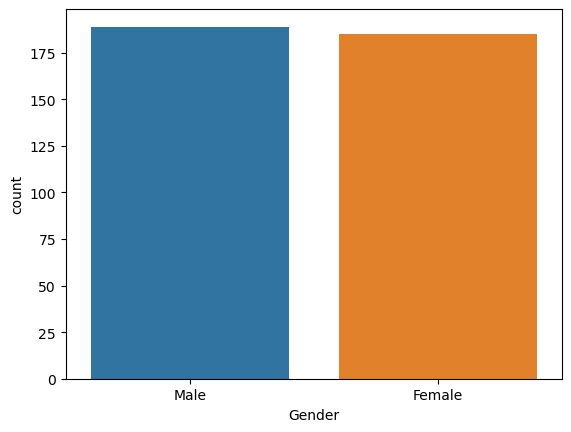

In [29]:
sns.countplot(x='Gender', data=df)

Which occupation has the highest average stress level?

In [30]:
stress_by_occ = df.groupby('Occupation')['Stress Level'].mean().sort_values(ascending=False)
print(stress_by_occ)


Occupation
Sales Representative    8.000000
Salesperson             7.000000
Scientist               7.000000
Doctor                  6.732394
Software Engineer       6.000000
Nurse                   5.547945
Lawyer                  5.063830
Manager                 5.000000
Accountant              4.594595
Teacher                 4.525000
Engineer                3.888889
Name: Stress Level, dtype: float64


<Axes: xlabel='Stress Level', ylabel='Occupation'>

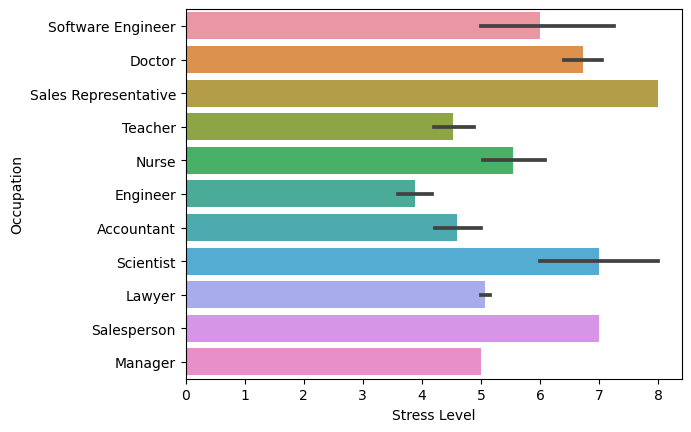

In [31]:
sns.barplot(x='Stress Level', y='Occupation', data=df, estimator=np.mean)

Is physical activity level positively related to sleep quality?

In [32]:
correlation = df['Physical Activity Level'].corr(df['Quality of Sleep'])
print(f"Correlation between Physical Activity and Sleep Quality: {correlation:.2f}")


Correlation between Physical Activity and Sleep Quality: 0.19


<Axes: xlabel='Physical Activity Level', ylabel='Quality of Sleep'>

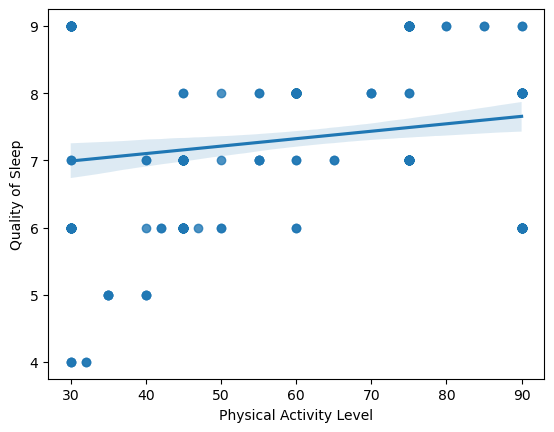

In [33]:
sns.regplot(x='Physical Activity Level', y='Quality of Sleep', data=df)

What is the most common BMI category?


In [34]:
most_common_bmi = df['BMI Category'].value_counts().idxmax()
print(f"Most Common BMI Category: {most_common_bmi}")


Most Common BMI Category: Normal


Is there a relationship between sleep quality and heart rate?

Correlation between Sleep Quality and Heart Rate: -0.66


<Axes: xlabel='Heart Rate', ylabel='Quality of Sleep'>

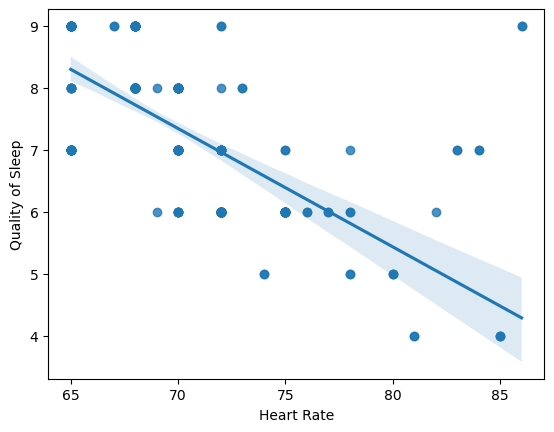

In [45]:
correlation = df['Quality of Sleep'].corr(df['Heart Rate'])
print(f"Correlation between Sleep Quality and Heart Rate: {correlation:.2f}")
sns.regplot(x='Heart Rate', y='Quality of Sleep', data=df)

Do people with normal blood pressure have better sleep quality?


In [36]:
bp_sleep_quality = df.groupby('Blood Pressure')['Quality of Sleep'].mean().sort_values(ascending=False)
print(bp_sleep_quality)


Blood Pressure
118/75    9.000000
139/91    9.000000
115/78    9.000000
115/75    8.000000
118/76    8.000000
119/77    8.000000
121/79    8.000000
122/80    8.000000
125/80    7.661538
140/95    7.523077
130/85    7.242424
120/80    7.022222
135/90    7.000000
135/88    7.000000
128/84    7.000000
125/82    7.000000
117/76    7.000000
142/92    7.000000
128/85    6.333333
126/83    6.000000
129/84    5.000000
130/86    5.000000
132/87    5.000000
140/90    4.500000
131/86    4.000000
Name: Quality of Sleep, dtype: float64


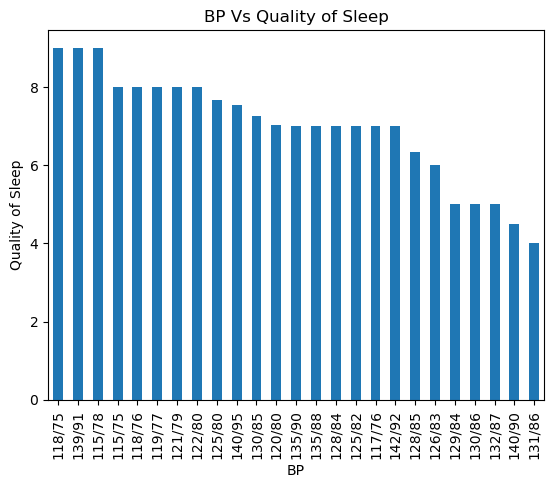

In [38]:
bp_sleep_quality.plot(kind = "bar")
plt.title("BP Vs Quality of Sleep")
plt.ylabel("BP")
plt.xlabel("Quality of Sleep")

What is the average number of daily steps per age group?

In [39]:
def age_group(age):
    if age < 26:
        return '18–25'
    elif age <= 40:
        return '26–40'
    else:
        return '41+'

df['Age Group'] = df['Age'].apply(age_group)
steps_by_age = df.groupby('Age Group')['Daily Steps'].mean().round()
print(steps_by_age)


Age Group
26–40    6738.0
41+      6879.0
Name: Daily Steps, dtype: float64


#### Hypotheses
* Null Hypothesis (H₀): There is no significant difference in sleep duration between people with and without sleep disorders.

* Alternative Hypothesis (H₁): There is a significant difference in sleep duration between people with and without sleep disorders

##### Research Objectives
* To assess the average sleep duration of individuals with and without sleep disorders.

* To test the assumption of normality for both groups.

* To perform an independent samples t-test to determine if sleep disorder status significantly affects sleep duration.

* To interpret and draw conclusions based on the p-value and statistical test results.

* To visualize the distribution of sleep duration across the two groups.

###### Group data

In [8]:

with_disorder = df[df['Sleep Disorder'] != 'None']['Sleep Duration']
without_disorder = df[df['Sleep Disorder'] == 'None']['Sleep Duration']

In [10]:
with_disorder.head()

3     5.9
4     5.9
5     5.9
6     6.3
16    6.5
Name: Sleep Duration, dtype: float64

In [11]:
without_disorder.head()

0    6.1
1    6.2
2    6.2
7    7.8
8    7.8
Name: Sleep Duration, dtype: float64

###### Boxplot: Sleep Duration by Sleep Disorder Status

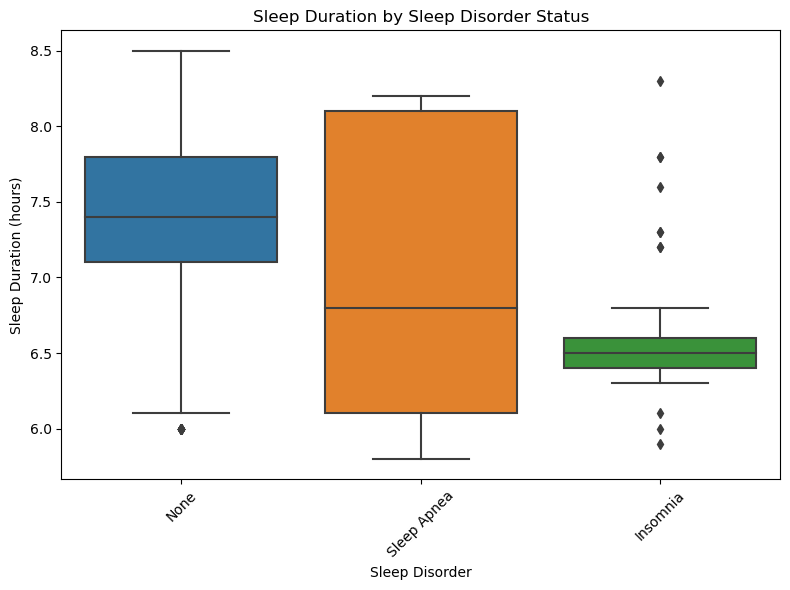

In [48]:

plt.figure(figsize=(8,6))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Sleep Disorder Status')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###### Histograms: Distribution of Sleep Duration for Each Group

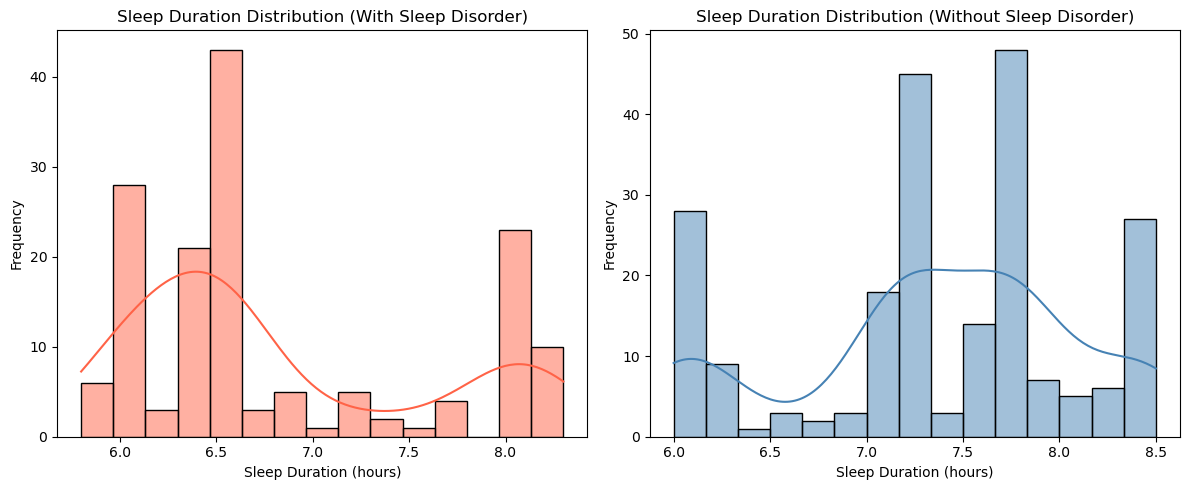

In [49]:
plt.figure(figsize=(12,5))

# Histogram for 'With Disorder'
plt.subplot(1, 2, 1)
sns.histplot(with_disorder, kde=True, color='tomato', bins=15)
plt.title('Sleep Duration Distribution (With Sleep Disorder)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')

# Histogram for 'Without Disorder'
plt.subplot(1, 2, 2)
sns.histplot(without_disorder, kde=True, color='steelblue', bins=15)
plt.title('Sleep Duration Distribution (Without Sleep Disorder)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [13]:
#Descriptive Statistics
print(f"\nMean Sleep Duration (With Disorder): {with_disorder.mean():.2f} hours")
print(f"Mean Sleep Duration (Without Disorder): {without_disorder.mean():.2f} hours")


Mean Sleep Duration (With Disorder): 6.81 hours
Mean Sleep Duration (Without Disorder): 7.36 hours


#### Descriptive Statistics Summary
###### Group	Mean Sleep Duration
* With Disorder	6.81 hours
* Without Disorder	7.36 hours

* Individuals without sleep disorders sleep, on average, about 0.55 hours (33 minutes) more than those with sleep disorders.

In [15]:
from scipy.stats import ttest_ind, shapiro

###### Normality Test (Shapiro-Wilk)

In [46]:

p1 = shapiro(with_disorder).pvalue
p2 = shapiro(without_disorder).pvalue
print(f"\nShapiro-Wilk p-value (With Disorder): {p1:.4f}")
print(f"Shapiro-Wilk p-value (Without Disorder): {p2:.4f}")
if p1 > 0.05 and p2 > 0.05:
    print("Both groups are normally distributed. Proceeding with t-test.")
else:
    print("At least one group may not be normal proceeding with non parametric test.")


Shapiro-Wilk p-value (With Disorder): 0.0000
Shapiro-Wilk p-value (Without Disorder): 0.0000
At least one group may not be normal proceeding with non parametric test


###### since both Shapiro-Wilk p-values are 0.0000, this means:
* Both groups significantly deviate from normality
* Since the normality assumption is violated, I will use the Mann-Whitney U Test, a non-parametric alternative to the independent t-test that compares medians rather than means.

###### Independent Samples T-Test

In [47]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(with_disorder, without_disorder, alternative='two-sided')

print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value: {p_val:.4f}")

Mann-Whitney U statistic: 10906.0
P-value: 0.0000


######  Interpretation of Results


###### Since the p-value is less than 0.05, we reject the null hypothesis (H₀). This means:

There is a statistically significant difference in sleep duration between individuals with sleep disorders and those without sleep disorders.

###### Practical Implication:
* Individuals without sleep disorders have a significantly longer average sleep duration (7.36 hours) compared to those with sleep disorders (6.81 hours).

* This difference of approximately 33 minutes per night could have important health and well-being implications.

###### Decision

In [18]:
 
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Sleep disorder significantly affects sleep duration.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")


Reject the null hypothesis: Sleep disorder significantly affects sleep duration.


###### Visualization

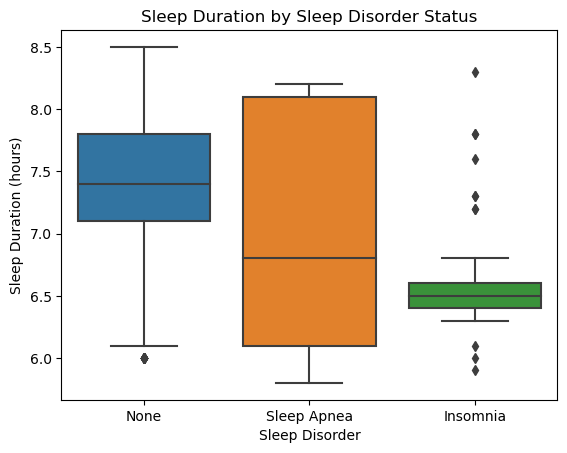

In [21]:

sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Sleep Disorder Status')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration (hours)')
plt.show()

###### Conclusion

* This study investgated whether sleep duration differs between individuals with and without sleep disorders. Using the Mann-Whitney U test due to non-normal data distribution, a significant difference was found (U = 10906.0, p < 0.001). Individuals without sleep disorders reported longer sleep durations, highlighting the impact of sleep disorders on sleep quality and quantity.